In [1]:
from dateutil.parser import parse
import matplotlib.pyplot as plt
import numpy as np

from src.data_handler import DataHandler
from src.additional_analysis_logic import autocorrelation_fit

from parameters import QudiHiraParameters

plt.style.use('seaborn')

## Tip 3G6

### RT
- "Autocorrelation\20220412-1229-18_150kcps_autocorrelation_fig"
- Confocal\"20220405-1244-03_first_approach_confocal_xy_image_1_fig"
- "Confocal\20220407-1111-24_after_bonding_confocal_xy_image_1_fig"
- "Confocal\20220412-1315-44_nv_disappered_confocal_xy_image_1_fig"
- "frq-sweep-qnami-after-bonding"


### UHV
- "Autocorrelation\20220518-1738-57_right_spot_10mW_autocorrelation_fig"
- "PulsedMeasurement\20220518-1017-50_t1_high_pressure_1ms_pulsed_measurement_fig"

# 20211025_UHVTesting_MembraneSample

In [2]:
membrane = DataHandler(measurement_folder="20211025_UHVTesting_MembraneSample", params=QudiHiraParameters)
membrane_confocals= membrane.load_measurement_list_into_dataclass_list([r"Confocal\20211027-0940-45__confocal_xy_image_1_fig"])

src.path_handler :: INFO :: Data folder path is \\kernix\qudiamond\Data\20211025_UHVTesting_MembraneSample
src.path_handler :: INFO :: Figure folder path is C:/Nextcloud\Data_Analysis\20211025_UHVTesting_MembraneSample


C:\Users\pinto\AppData\Local\Temp\ipykernel_12836\3598115825.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(img, ax=ax)


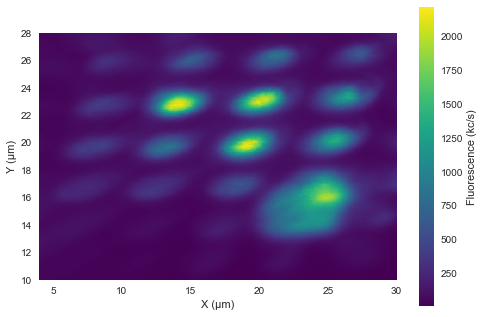

In [3]:
fig, ax = plt.subplots(nrows=len(membrane_confocals))

for idx, confocal in enumerate(membrane_confocals):
    extent = np.array([confocal.params['X image min (m)'], confocal.params['X image max (m)'], confocal.params['Y image min'], confocal.params['Y image max']]) * 1e6
    img = ax.imshow(confocal.data / 1e3, cmap="viridis", origin="lower", extent=extent)
    cbar = fig.colorbar(img, ax=ax)
    cbar.set_label("Fluorescence (kc/s)")
    ax.set_xlabel("X (μm)")
    ax.set_ylabel("Y (μm)")
    ax.grid(False)

# Tip 3E7

In [4]:
tip_3E7 = DataHandler(measurement_folder="20220222_FR0612-3E7_RT", params=QudiHiraParameters)
tip_3E7_confocals = tip_3E7.load_measurement_list_into_dataclass_list([r"Confocal\20220223-1215-56_tip_1_confocal_xy_image_1_fig"])

src.path_handler :: INFO :: Data folder path is \\kernix\qudiamond\Data\20220222_FR0612-3E7_RT
src.path_handler :: INFO :: Figure folder path is C:/Nextcloud\Data_Analysis\20220222_FR0612-3E7_RT


C:\Users\pinto\AppData\Local\Temp\ipykernel_12836\458164708.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(img, ax=ax)


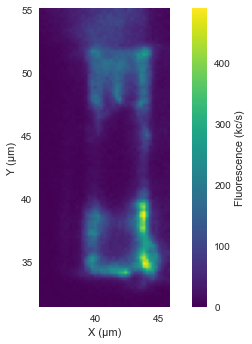

In [5]:
fig, ax = plt.subplots(nrows=len(tip_3E7_confocals))

for idx, confocal in enumerate(tip_3E7_confocals):
    extent = np.array([confocal.params['X image min (m)'], confocal.params['X image max (m)'], confocal.params['Y image min'], confocal.params['Y image max']]) * 1e6
    img = ax.imshow(confocal.data / 1e3, cmap="viridis", origin="lower", extent=extent)
    cbar = fig.colorbar(img, ax=ax)
    cbar.set_label("Fluorescence (kc/s)")
    ax.set_xlabel("X (μm)")
    ax.set_ylabel("Y (μm)")
    ax.grid(False)

# Tip 3P16

In [6]:
tip_3P16 = DataHandler(measurement_folder="20220304_FR0612-F2-3P16", params=QudiHiraParameters)
tip_3P16_measurements = tip_3P16.load_measurement_list_into_dataclass_list([
        r"PulsedMeasurement\20220316-1434-53_rabi_broken_cable_22dBm_pulsed_measurement",
        r"PulsedMeasurement\20220316-1545-42_ramsey_broken_cable_22dBm_pulsed_measurement_fig",
        r"Counter\20220316-2219-26_count_trace_fig",
        r"Counter\20220316-2246-44_count_trace_background_fig",
        r"PulsedMeasurement\20220315-2050-39_odmr_22dBm_600ns_pulsed_measurement_fig"
    ]
)

src.path_handler :: INFO :: Data folder path is \\kernix\qudiamond\Data\20220304_FR0612-F2-3P16
src.path_handler :: INFO :: Figure folder path is C:/Nextcloud\Data_Analysis\20220304_FR0612-F2-3P16


## Rabi

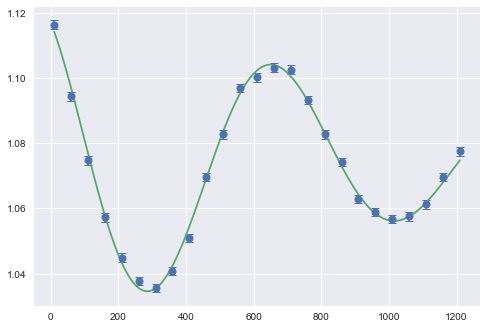

In [7]:
rabi = tip_3P16_measurements[0]

fig, ax = plt.subplots()
x = rabi.pulsed.measurement.data["Controlled variable(s)"] * 1e9
y, yerr = rabi.analysis.analyse_mean_norm(rabi.pulsed.laser_pulses.data, signal_start=150e-9, signal_end=250e-9, norm_start=1000e-9, norm_end=2000e-9)
ax.errorbar(x, y, yerr=yerr, fmt="o", capsize=4, markeredgewidth=1)

fit_x, fit_y, result = rabi.analysis.perform_fit(x=x, y=y, fit_function="sinestretchedexponentialdecay")
ax.plot(fit_x, fit_y)

## Ramsey

<ErrorbarContainer object of 3 artists>

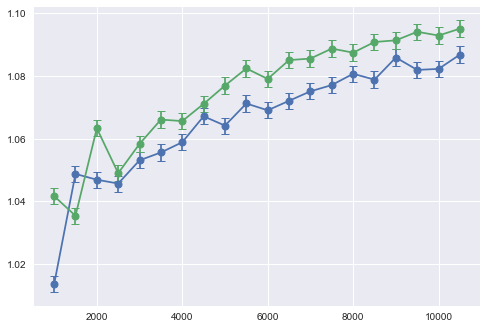

In [8]:
ramsey = tip_3P16_measurements[1]

fig, ax = plt.subplots()
x = ramsey.data["Controlled variable(s)"] * 1e9
y1, y1err = ramsey.data["Signal"], ramsey.data["Error"]
y2, y2err = ramsey.data["Signal2"], ramsey.data["Error2"]

ax.errorbar(x, y1, yerr=y1err, fmt="o-", capsize=4, markeredgewidth=1)
ax.errorbar(x, y2, yerr=y2err, fmt="o-", capsize=4, markeredgewidth=1)

## Timetrace

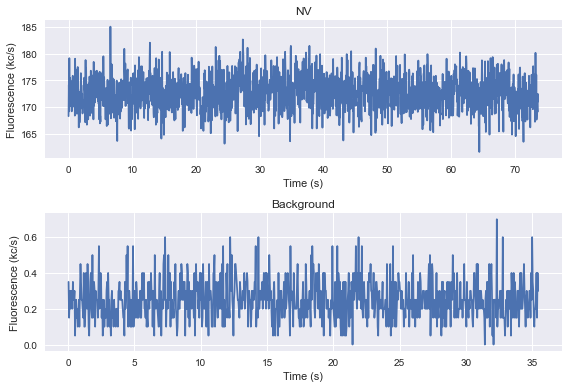

In [9]:
fig, ax = plt.subplots(nrows=2)
titles = ["NV", "Background"]

for idx, counter in enumerate(tip_3P16_measurements[2:4]):
    ax[idx].plot(counter.data["Time (s)"], counter.data["Signal0 (counts/s)"] / 1e3)
    ax[idx].set_ylabel("Fluorescence (kc/s)")
    ax[idx].set_xlabel("Time (s)")
    ax[idx].set_title(titles[idx])
    
fig.tight_layout()

## ODMR

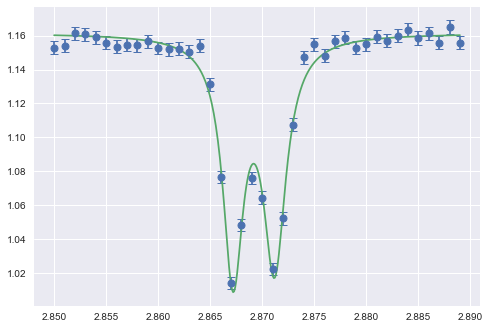

In [10]:
odmr = tip_3P16_measurements[4]
fig, ax = plt.subplots()
x = odmr.data["Controlled variable(Hz)"] / 1e9
y, yerr = odmr.analysis.analyse_mean_norm(odmr.pulsed.laser_pulses.data, signal_start=100e-9, signal_end=250e-9, norm_start=1000e-9, norm_end=2000e-9)

ax.errorbar(x, y, yerr=yerr, fmt="o", capsize=4, markeredgewidth=1)
fit_x, fit_y, result = odmr.analysis.perform_fit(x=x, y=y, fit_function="lorentziandouble", estimator="dip")
ax.plot(fit_x, fit_y)

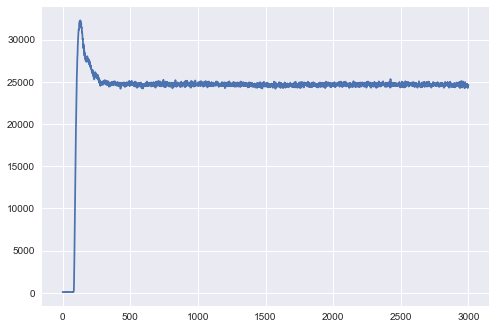

In [11]:
fig, ax = plt.subplots()

ax.plot(np.sum(odmr.pulsed.laser_pulses.data, axis=0))

# Tip 3B4

In [12]:
tip_3B4 = DataHandler(measurement_folder="20220330_FR0612-F2-3B4", params=QudiHiraParameters)
tip_3B4_measurements = tip_3B4.load_measurement_list_into_dataclass_list([
        r"Confocal\20220404-1557-16_full_image_after_bonding_confocal_xy_image_1_fig",
        r"Confocal\20220405-1004-19_overnight_focusing_confocal_xy_image_1_fig",
        r"Autocorrelation\20220330-1617-38_autocorrelation_fig",
        r"frq-sweep-akiyama002",
    ]
)

src.path_handler :: INFO :: Data folder path is \\kernix\qudiamond\Data\20220330_FR0612-F2-3B4
src.path_handler :: INFO :: Figure folder path is C:/Nextcloud\Data_Analysis\20220330_FR0612-F2-3B4


## Confocal

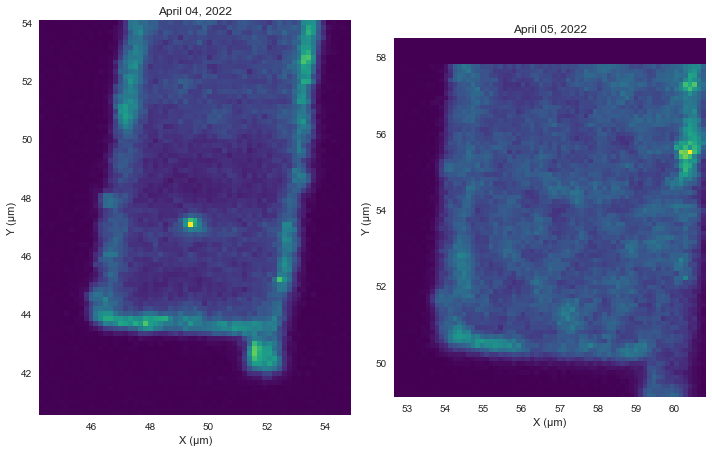

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 8))

for idx, confocal in enumerate(tip_3B4_measurements[0:2]):
    extent = np.array([confocal.params['X image min (m)'], confocal.params['X image max (m)'], confocal.params['Y image min'], confocal.params['Y image max']]) * 1e6
    ax[idx].grid(False)
    img = ax[idx].imshow(confocal.data / 1e3, cmap="viridis", origin="lower", extent=extent)
    ax[idx].set_xlabel("X (μm)")
    ax[idx].set_ylabel("Y (μm)")
    ax[idx].set_title(confocal.timestamp.strftime("%B %d, %Y"))
    
fig.tight_layout()

## Autocorrelation

Text(0, 0.5, '$g^{(2)}(t)$')

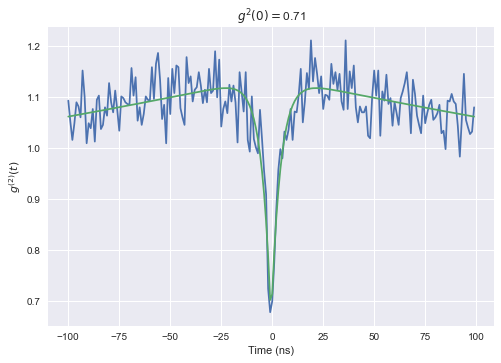

In [14]:
autocorr = tip_3B4_measurements[2]

x = autocorr.data["Time (ps)"] / 1e3
y = autocorr.data["g2(t) norm"]

fig, ax = plt.subplots()
ax.plot(x, y, "-")

fit_x, fit_y, result = autocorrelation_fit(x, y)
ax.plot(fit_x, fit_y)

ax.set_title(f"$g^{(2)}(0) = ${round(result['g2_0'], 2)}")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("$g^{(2)}(t)$")

## AFM

Text(0.5, 1.0, 'Q-factor = 937')

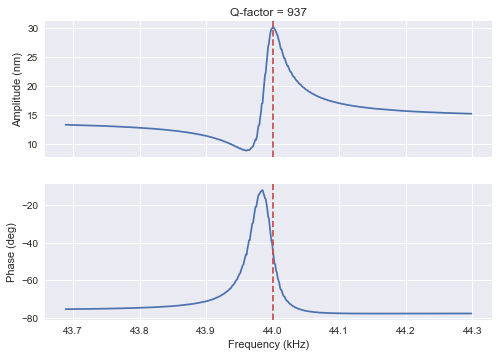

In [15]:
afm = tip_3B4_measurements[3]

x = afm.data["Frequency Shift (Hz)"] / 1e3
center_freq = afm.params["Center Frequency (Hz)"] / 1e3

amplitude = afm.data["Amplitude (m)"] * 1e9
phase = afm.data["Phase (deg)"]

fig, (ax, ax1) = plt.subplots(nrows=2, sharex=True)

ax.plot(x + center_freq, amplitude)
ax.set_ylabel("Amplitude (nm)")
ax1.plot(x + center_freq, phase)
ax1.set_ylabel("Phase (deg)")

ax1.set_xlabel("Frequency (kHz)")

resonance_freq = tip_3B4_measurements[3].params["f_res (Hz)"] / 1e3
ax.axvline(resonance_freq, linestyle="--", color="C2")
ax1.axvline(resonance_freq, linestyle="--", color="C2")

ax.set_title(f"Q-factor = {int(afm.params['Q'])}")

# Tip 3C2 - RT vs UHV

In [16]:
tip_3C2 = DataHandler(measurement_folder="20220405_FR0612-F2-3C2", params=QudiHiraParameters)
tip_3C2_measurements = tip_3C2.load_measurement_list_into_dataclass_list([
        r"Autocorrelation\20220414-1352-12_autocorrelation_fig",
        r"PulsedMeasurement\20220420-1039-44_t1_25ms_pulsed_measurement_fig"
    ]
)

src.path_handler :: INFO :: Data folder path is \\kernix\qudiamond\Data\20220405_FR0612-F2-3C2
src.path_handler :: INFO :: Figure folder path is C:/Nextcloud\Data_Analysis\20220405_FR0612-F2-3C2


In [17]:
tip_3C2_uhv = DataHandler(measurement_folder="20220505_FR0612-F2-3B6_uhv", params=QudiHiraParameters)
tip_3C2_uhv_measurements = tip_3C2_uhv.load_measurement_list_into_dataclass_list([
        r"Confocal\20220506-2113-21__confocal_xy_image_1_fig",
        r"Counter\20220506-1425-39_count_trace_fig",
        r"Autocorrelation\20220506-2058-44_autocorrelation_fig",
        r"PulsedMeasurement\20220515-2324-45_t1_6ms_pulsed_measurement_fig"
    ]
)

src.path_handler :: INFO :: Data folder path is \\kernix\qudiamond\Data\20220505_FR0612-F2-3B6_uhv
src.path_handler :: INFO :: Figure folder path is C:/Nextcloud\Data_Analysis\20220505_FR0612-F2-3B6_uhv


## Autocorrelation

Text(0.5, 0, 'Time (ns)')

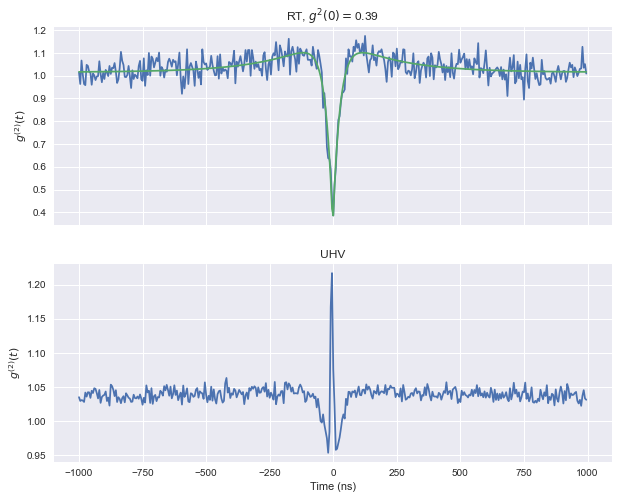

In [18]:
autocorr = tip_3C2_measurements[0]

fig, (ax, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 8))

x = autocorr.data["Time (ps)"] / 1e3
y = autocorr.data["g2(t) norm"]

ax.plot(x, y, "-")

ax.set_ylabel("$g^{(2)}(t)$")
ax.set_title("RT")

fit_x, fit_y, result = autocorrelation_fit(x, y)
ax.plot(fit_x, fit_y)

ax.set_title(f"RT, $g^{(2)}(0) = ${round(result['g2_0'], 2)}")

autocorr = tip_3C2_uhv_measurements[2]
x = autocorr.data["Time (ps)"] / 1e3
y = autocorr.data["g2(t) norm"]

ax1.plot(x, y, "-")
ax1.set_title("UHV")
ax1.set_ylabel("$g^{(2)}(t)$")
ax1.set_xlabel("Time (ns)")

## T1

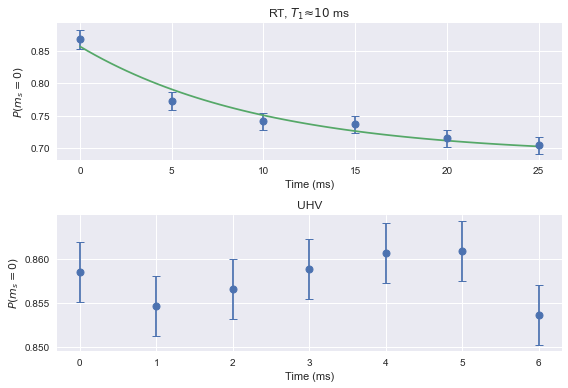

In [19]:
fig, (ax, ax1) = plt.subplots(nrows=2)

t1 = tip_3C2_measurements[1]

x = t1.data["Controlled variable(s)"] * 1e3
y, yerr = t1.analysis.analyse_mean_norm(t1.pulsed.laser_pulses.data, signal_start=150e-9, signal_end=250e-9, norm_start=1000e-9, norm_end=2000e-9)
ax.errorbar(x, y, yerr=yerr, fmt="o", capsize=4, markeredgewidth=1)

fit_x, fit_y, result = t1.analysis.perform_fit(x=x, y=y, fit_function="decayexponential")
ax.plot(fit_x, fit_y)
ax.set_title(f"RT, $T_1 ≈ {int(result.params['lifetime'].value)}$ ms")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("$P (m_s = 0)$")


t1 = tip_3C2_uhv_measurements[3]

x = t1.data["Controlled variable(s)"] * 1e3

y, yerr = t1.analysis.analyse_mean_norm(t1.pulsed.laser_pulses.data, signal_start=150e-9, signal_end=250e-9, norm_start=1000e-9, norm_end=2000e-9)
ax1.errorbar(x, y, yerr=yerr, fmt="o", capsize=4, markeredgewidth=1)

ax1.set_title(f"UHV")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("$P (m_s = 0)$")

fig.tight_layout()

# Tip 3C2 - UHV

## Confocal

C:\Users\pinto\AppData\Local\Temp\ipykernel_12836\1358397235.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(img, ax=ax)


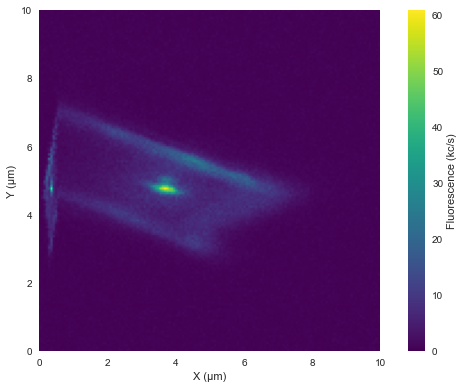

In [20]:
confocal = tip_3C2_uhv_measurements[0]

fig, ax = plt.subplots()

extent = np.array([confocal.params['X image min (m)'], confocal.params['X image max (m)'], confocal.params['Y image min'], confocal.params['Y image max']]) * 1e3
img = ax.imshow(confocal.data / 1e3, cmap="viridis", origin="lower", extent=extent)
cbar = fig.colorbar(img, ax=ax)
cbar.set_label("Fluorescence (kc/s)")
ax.set_xlabel("X (μm)")
ax.set_ylabel("Y (μm)")
ax.grid(False)

fig.tight_layout()

## Timetrace

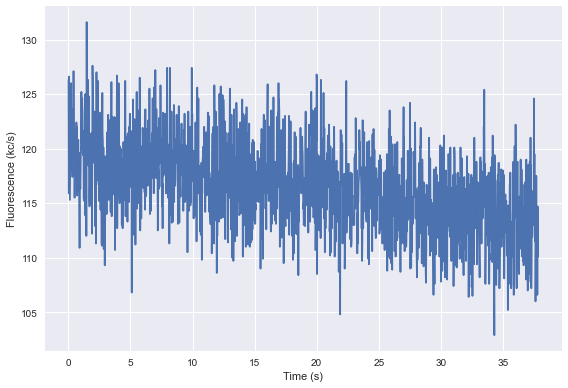

In [21]:
fig, ax = plt.subplots()

counter = tip_3C2_uhv_measurements[1]
ax.plot(counter.data["Time (s)"], counter.data["Signal0 (counts/s)"] / 1e3)
ax.set_ylabel("Fluorescence (kc/s)")
ax.set_xlabel("Time (s)")
    
fig.tight_layout()